<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [77]:
from sqlalchemy import create_engine
import sqlalchemy
import psycopg2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
print(plotly.__version__)

import requests # Импортируем библиотеку requests
from pprint import pprint # Импортируем функцию pprint()
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

5.10.0


In [78]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [79]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

connection = create_engine(f'postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}')
n = 10
query = f'''select *
           from public.areas
           limit {n}
        '''
hh_df = pd.read_sql_query(query, connection)
display(hh_df)


,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург
5,1,Москва
6,2061,Подольск (Московская область)
7,1545,Новочеркасск
8,2759,Ташкент
9,3695,Промышленная


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [80]:
# текст запроса
query_3_1 = f'''
            SELECT 
               count(id)
            FROM 
               public.vacancies
        '''


In [81]:
# результат запроса
hh_df = pd.read_sql_query(query_3_1, connection)
display(hh_df)

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [82]:
# текст запроса
query_3_2 = f'''
            SELECT 
               count(id)
            FROM 
               public.employers
        '''

In [83]:
# результат запроса
hh_df = pd.read_sql_query(query_3_2, connection)
display(hh_df)

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [84]:
# текст запроса
query_3_3 = f'''
            SELECT 
               count(id)
            FROM 
               public.areas
        '''

In [85]:
# результат запроса
hh_df = pd.read_sql_query(query_3_3, connection)
display(hh_df)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [86]:
# текст запроса
query_3_4 = f'''
            SELECT 
               count(id)
            FROM 
               public.industries
        '''

In [87]:
# результат запроса
hh_df = pd.read_sql_query(query_3_4, connection)
display(hh_df)

,count
0,294


***

# выводы по предварительному анализу данных
1. Основная таблица vacancies содержит 49197 записей
2. таблица vacancies связана отношением много-к-одному с таблицами employers с 23501 записями areas с 1362 записями по ключам employer_id и area_id соответственно
3. таблица employers_industries связана отношением много-к-одному с таблицами employers с 23501 записями и industries с 294 записями по ключам employer_id и industries_id соответственно

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [88]:
# текст запроса
query_4_1 = f'''
            SELECT 
                count(v.id) as cnt,
                a.name as area
            FROM 
                public.vacancies as v
            JOIN public.areas as a on v.area_id=a.id
            GROUP by a.id
            ORDER by 1 DESC
        '''

In [ ]:
query_4_1 = f'''
            SELECT 
                count(v.id) as cnt,
                a.name as area
            FROM 
                public.employers as e
            JOIN public.areas as a on v.area_id=a.id
            GROUP by a.id
            ORDER by 1 DESC
        '''

In [89]:
# результат запроса
hh_df = pd.read_sql_query(query_4_1, connection)
display(hh_df)

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Кизляр
765,1,Джизак
766,1,Эртиль
767,1,Арсеньев


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [90]:
# текст запроса
query_4_2 = f'''
            SELECT 
                count(*)
            FROM 
                public.vacancies as v
            WHERE
                salary_to IS NOT NULL 
                OR 
                salary_from IS NOT NULL
        '''

In [91]:
# результат запроса
hh_df = pd.read_sql_query(query_4_2, connection)
display(hh_df)

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [92]:
# текст запроса
query_4_3 = f'''
            SELECT 
                round(avg(v.salary_from), 0) avg_min,
                round(avg(v.salary_to), 0) avg_max
            FROM 
                public.vacancies as v
            WHERE
                salary_to IS NOT NULL 
                or 
                salary_from is NOT NULL     
        '''


In [93]:
# результат запроса
hh_df = pd.read_sql_query(query_4_3, connection)
display(hh_df)
#print('средние значения для нижней и верхней границы зарплатной вилки: {} {} '.format(hh_df['avg_min'].iloc[0], hh_df['avg_max'].iloc[0]))


,avg_min,avg_max
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [94]:
# текст запроса
query_4_4 = f'''
            SELECT
                distinct
                (v.schedule,
                v.employment) as type,
                count(v.id)
            FROM 
                public.vacancies as v
            GROUP by v.schedule, v.employment
            ORDER by 2 desc
        '''

In [95]:
# результат запроса
hh_df = pd.read_sql_query(query_4_4, connection)
display(hh_df)

,type,count
0,"(""Полный день"",""Полная занятость"")",35367
1,"(""Удаленная работа"",""Полная занятость"")",7802
2,"(""Гибкий график"",""Полная занятость"")",1593
3,"(""Удаленная работа"",""Частичная занятость"")",1312
4,"(""Сменный график"",""Полная занятость"")",940
5,"(""Полный день"",Стажировка)",569
6,"(""Вахтовый метод"",""Полная занятость"")",367
7,"(""Полный день"",""Частичная занятость"")",347
8,"(""Гибкий график"",""Частичная занятость"")",312
9,"(""Полный день"",""Проектная работа"")",141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [96]:
# текст запроса
query_4_5 = f'''
            SELECT 
                v.experience,
                count(v.id)
            FROM 
                public.vacancies as v
            WHERE v.experience IS NOT NULL
            GROUP by v.experience
            ORDER BY 2
        '''

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


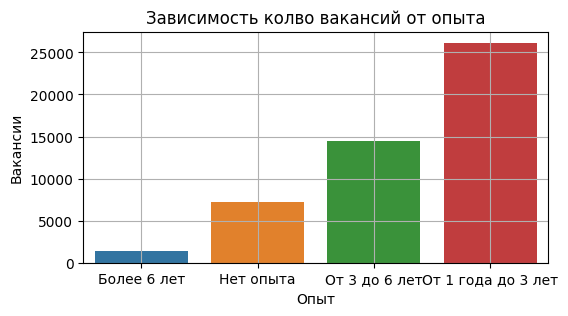

In [97]:
# результат запроса
hh_df = pd.read_sql_query(query_4_5, connection)
display(hh_df)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

histplot = sns.barplot(
    data=hh_df,
    x='experience',
    y='count',
    )
histplot.set_title('Зависимость колво вакансий от опыта');
histplot.set_xlabel('Опыт')
histplot.set_ylabel('Вакансии')
plt.grid()

***

# выводы по детальному анализу вакансий

1. первые топ 3 региона (Москва, Сант Петербург и Минск) содержат около 25% всех вакансий
2. Поля зарплаты заполнены в примерно 50%, для потенциальных кандидатов это очень важные поля и могут являться причиной не откликаться на вакансию
3. средняя минимальная зарплата 71065 является достаточно высокой, это значит очень много вакансий с конкурентными зарплатами. 
Средняя максимальная зарплата 110537 мало о чем может сказать так разброс очень большой от 60 (скорее всего выброс ) до 1.000.000
4. наибольшее колво вакансий для "Полный день" и "Полная занятость", около 71%,  на "Полная занятость" приходится 95% всех вакансий, что в общем ожидаемо
5. очень интересные результаты по зависимости колва вакансий от опыта - обратная зависимость. для кандидатов  с нименьшим опытом от "1го до 3х лет" открыто больше всего вакансий - 53% 




# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [98]:
# текст запроса
query_5_1 = f'''
            SELECT
                e.name,
                count(v.id)
            FROM 
                public.vacancies as v
            JOIN public.employers as e on v.employer_id=e.id
            GROUP by e.id
            ORDER by 2 desc LIMIT 5
        '''

In [99]:
# результат запроса
hh_df = pd.read_sql_query(query_5_1, connection)
display(hh_df)

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


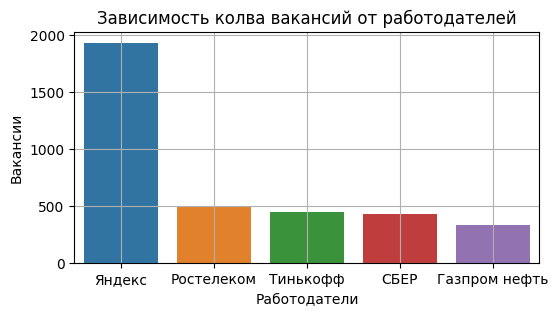

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

histplot = sns.barplot(
    data=hh_df,
    x='name',
    y='count',
    )
histplot.set_title('Зависимость колва вакансий от работодателей');
histplot.set_xlabel('Работодатели')
histplot.set_ylabel('Вакансии')
plt.grid()

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [101]:
# текст запроса
query_5_2 = f'''
            SELECT
                a.name as area,
                count(e.id) as employers_cnt,
                count(v.id) as vacancies_cnt
            FROM 
                public.areas as a
            LEFT JOIN public.vacancies as v on v.area_id=a.id
            LEFT JOIN public.employers as e on e.area=a.id
            WHERE v.id IS NULL
            GROUP by a.id
            ORDER by 2 desc limit 10
        '''

In [102]:
# результат запроса
hh_df = pd.read_sql_query(query_5_2, connection)
display(hh_df)

,area,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [138]:
# текст запроса
query_5_3 = f'''
            SELECT
                e.name as employer,
                count(distinct v.area_id) as area_cnt
            FROM 
                public.vacancies as v
            JOIN public.employers as e on v.employer_id=e.id
            GROUP by e.id
            ORDER by 2 desc
        '''

In [139]:
# результат запроса
hh_df = pd.read_sql_query(query_5_3, connection)
display(hh_df)

,employer,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [105]:
# текст запроса
query_5_4 = f'''
            SELECT
                count(e.id)
            FROM 
                public.employers as e
            LEFT JOIN public.employers_industries as ei on ei.employer_id=e.id
            WHERE 
                ei.industry_id IS NULL
        '''

In [106]:
# результат запроса
hh_df = pd.read_sql_query(query_5_4, connection)
display(hh_df)

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [107]:
# текст запроса
query_5_5 = f'''
            SELECT
                e.name
            FROM 
                public.employers_industries as ei
            JOIN public.employers as e on ei.employer_id=e.id
            GROUP by e.id
            having count(ei.industry_id) = 4
            --ORDER by 1 limit 1 offset 2
            ORDER by 1 limit 5
        '''

In [108]:
# результат запроса
hh_df = pd.read_sql_query(query_5_5, connection)
display(hh_df)

,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [109]:
# текст запроса
query_5_6 = f'''
            SELECT
                count(e.id)
            FROM 
                public.employers as e
            JOIN public.employers_industries as ei on ei.employer_id=e.id
            JOIN public.industries as i on ei.industry_id=i.id
            WHERE i.name LIKE 'Разработка программного обеспечения'
        '''

In [110]:
# результат запроса
hh_df = pd.read_sql_query(query_5_6, connection)
display(hh_df)

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [111]:
# код для получения списка городов-милионников
#cities_template = ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
city_list=[]

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Задаём адрес ресурса

'''
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
table=page.find('table', {'class':"standard sortable"}) # find table wit specific class
rows = table.find_all('tr') # create a list with table's tr attribute

for row in rows:
    cols = row.find_all('td')
    cols = [el.text.strip() for el in cols] # remove all foramting code
    cols = [ele.replace('[a]', '') for ele in cols ]
    
    if cols:
        city_list.append(cols[1]) # first element is the city name
        
#print(city_list)
'''

cities = list(pd.read_html(url, attrs={'class':'standard sortable'})[0]['Город'])
cities = [x.replace('[a]', '') for x in cities]
cities = tuple(cities)
print(cities)


('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [112]:
# текст запроса
query_5_7 = f'''
            (
            SELECT
                a.name,
                count(v.id)
            FROM 
                public.areas as a
            JOIN public.vacancies as v on v.area_id=a.id
            JOIN public.employers as e on e.id=v.employer_id
            WHERE 
                a.name IN {cities}
                and
                e.name='Яндекс'
            GROUP BY a.id 
            )
            UNION ALL
            (
            SELECT 
                'Total',
                count(v.id)
            FROM 
                public.areas as a
            JOIN public.vacancies as v on v.area_id=a.id
            JOIN public.employers as e on e.id=v.employer_id
            WHERE 
                a.name IN {cities}
                and
                e.name='Яндекс'
            )
           ORDER BY 2
        '''


In [113]:
# результат запроса
hh_df = pd.read_sql_query(query_5_7, connection)
display(hh_df)

,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


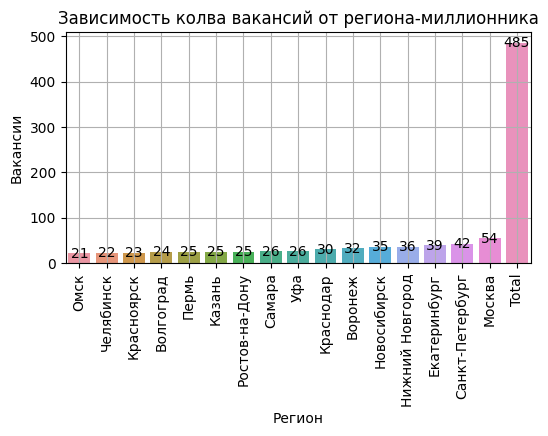

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

histplot = sns.barplot(
    data=hh_df,
    x='name',
    y='count',
    )
histplot.set_title('Зависимость колва вакансий от региона-миллионника');
histplot.set_xlabel('Регион')
histplot.set_ylabel('Вакансии')
histplot.set_xticklabels(histplot.get_xticklabels(),rotation = 90)
for g in histplot.patches:
    histplot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 0),
                   textcoords = 'offset points')
plt.grid()

***

# выводы по анализу работодателей
1. распределение работодателей по колву вакансий очень плавное с резким отрывом для Яндекса, у которого открыто в 4 раза больше вакансий чем у следущего за ним Ростелекома. Не совсем ясна причина, возможно у Яндекса очень много пересекающихся друг с другом вакансий, т.е. один кандидат может удовлетворять сразу нескольким. Это хорошо помогает для поиска потенциальных кандидатов, но сильно нарушает общую картину в потребности на рынке. Также не совсем понятно такое большое колво вакансий у Тинькофф, возможно связано с тем что это новый банк и он активно набирает сотрудников
2. Работодатели указывают регион в котором они находятся и это может не совпадать с названием регионов которые указаны для поиска вакансий, потому что это как правило конкретный город. Например многие работодатели указывают своим регионом Россия.
3. Для распределения вакансий от работодателей по регионом важно понимать насколько работодатель предствлен на территориях, глобальные игроки вроде Яндекса и Ростелекома не вызывают вопросов. но кто такой "Поляков Денис Иванович" который ищет кандитов для "Компьютерный мастер" по всей России?
4. многие работодатели  около 17% не указывают свою сферу  деятельности что может негативно повлиять на отклики
5. с другой стороно много работодателей которые указывают по 30 сфер! что помогает им в поиске кандидатов так как позволяет использовать все возможные ключевые слова, но это может сильно запутать кандидата. 
6. "Разработка программного обеспечения" самая часто используемая сфера, потом идет "Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг" и "Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)"
7. Распределения вакансий открытых в Яндекс по городам миллионникам достаточно предсказуемое и близкр коррелирует с колвом населения. Также интересно что большая часть около 75% открыта в других городах


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [115]:
# текст запроса
query_6_1 = f'''
            SELECT
                count(v.id)
            FROM
                public.vacancies as v
            WHERE 
                LOWER(v.name) LIKE '%%data%%'
                or 
                LOWER(v.name) LIKE '%%данн%%'
        '''

In [116]:
# результат запроса
hh_df = pd.read_sql_query(query_6_1, connection)
display(hh_df)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [117]:
# текст запроса
query_6_2 = f'''
            SELECT 
                count(*)
            FROM 
                public.vacancies
            WHERE
                (LOWER(name) like '%%data scientist%%' or 
                LOWER(name) like '%%data science%%' or
                LOWER(name) like '%%исследователь данных%%' or
                LOWER(name) like '%%machine learning%%' or
                LOWER(name) like '%%машинн%%обучен%%' or
                (name like '%%ML%%' and UPPER(name) not like '%%HTML%%'))
                and
                (LOWER(name) like '%%junior%%'
                or
                experience='Нет опыта'
                or
                employment='Стажировка'
                )
        '''
        

In [118]:
# результат запроса
hh_df = pd.read_sql_query(query_6_2, connection)
display(hh_df)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [119]:
# текст запроса
query_6_3 = f'''
            SELECT 
                count(*)
            FROM 
                public.vacancies
            WHERE
                (LOWER(name) like '%%data scientist%%' or 
                LOWER(name) like '%%data science%%' or
                LOWER(name) like '%%исследователь данных%%' or
                LOWER(name) like '%%machine learning%%' or
                LOWER(name) like '%%машинн%%обучен%%' or
                (name like '%%ML%%' and UPPER(name) not like '%%HTML%%'))
                and
                (UPPER(key_skills) like '%%SQL%%'
                or
                LOWER(key_skills) like '%%postgres%%'
                )
        '''

In [120]:
# результат запроса
hh_df = pd.read_sql_query(query_6_3, connection)
display(hh_df)

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [121]:
# текст запроса
query_6_4 = f'''
            SELECT 
                count(*)
            FROM 
                public.vacancies
            WHERE
                (LOWER(name) like '%data scientist%' or 
                LOWER(name) like '%data science%' or
                LOWER(name) like '%исследователь данных%' or
                LOWER(name) like '%machine learning%' or
                LOWER(name) like '%машинн%обучен%' or
                (name like '%ML%' and UPPER(name) not like '%HTML%'))
                and
                LOWER(key_skills) like '%python%'
        '''

In [122]:
# результат запроса
hh_df = pd.read_sql_query(sqlalchemy.text(query_6_4), connection)
display(hh_df)

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [123]:
# текст запроса
query_6_5 = f'''
            SELECT 
                (ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1),2))
            FROM 
                public.vacancies
            WHERE
                (LOWER(name) like '%data scientist%' or 
                LOWER(name) like '%data science%' or
                LOWER(name) like '%исследователь данных%' or
                LOWER(name) like '%machine learning%' or
                LOWER(name) like '%машинн%обучен%' or
                (name like '%ML%' and UPPER(name) not like '%HTML%'))
                AND 
                key_skills IS NOT NULL
        '''

In [124]:
# результат запроса
hh_df = pd.read_sql_query(sqlalchemy.text(query_6_5), connection)
display(hh_df)

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [125]:
# текст запроса
query_6_6 = f'''
            SELECT
                distinct (experience),
                ROUND(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2), 0)
            FROM 
                public.vacancies
            WHERE
                (LOWER(name) like '%data scientist%' or 
                LOWER(name) like '%data science%' or
                LOWER(name) like '%исследователь данных%' or
                LOWER(name) like '%machine learning%' or
                LOWER(name) like '%машинн%обучен%' or
                (name like '%ML%' and UPPER(name) not like '%HTML%'))
                AND 
                (salary_to IS NOT NULL 
                or 
                salary_from is NOT NULL)
            GROUP BY experience
        '''

In [126]:
# результат запроса
hh_df = pd.read_sql_query(sqlalchemy.text(query_6_6), connection)
display(hh_df)

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
1. Для дата-сайентиста доступно 480 вакансия, что в принципе не плохо, но в общем объеме это мало,из них 51 для начинающих, что позволяет устроиться на первую работу и набирая опыт и стаж продвигаться дальше, разброс зарплаты для junior от 45000 до 150000, в среднем 75000 что очень не плохо. Для продвинутых специалистов зарплата в среднем до 250000
2. Ожидаемо что связка Питон и/или SQL очень востребована и покрывает порядка 50% всех вакансий для дата-сайентистов
3. Анализ ключевых навыков показывает что все крутиться вокруг Питон, SQL, анализа данных и машинного обучения, в общем все что связано с DataScience можно использовать в поиске

# Общий вывод по проекту

### подведем итог исследования, обобщите выводы
1. Яндекс ищет больше всего кандидатов в том числе дата-сайенс направление
2. Для дата-сайентиста даже без опыта есть достаточно много вакансий с хорошими предложениями по зарплате
3. Регионы представлены очень широко что позволяет найти подходящий и не только города миллионники

##### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
1. Нужно провести исследования на предмет распределения вакансий дата-сайенс по регионам и работодателям
2. Посчитать колво вакансий с возможностью удаленной работы по регионам


